In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import keras
import os

2022-01-03 11:51:29.243434: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-03 11:51:29.243465: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)


In [3]:
train_dir = '/home/vimalkumar/Documents/Classification/invoice/invoice model/train'
test_dir = '/home/vimalkumar/Documents/Classification/invoice/invoice model/test'


In [4]:
train_dataset = train.flow_from_directory(train_dir,
                                         target_size=(200,200),
                                         batch_size=64,
                                         class_mode='categorical')

test_dataset = train.flow_from_directory(test_dir,
                                         target_size=(200,200),
                                         batch_size=64,
                                         class_mode='categorical')

Found 326 images belonging to 1 classes.
Found 36 images belonging to 1 classes.


In [71]:
train_dataset.class_indices

{'invoice': 0}

In [72]:
test_dataset.class_indices

{'invoice': 0}

In [24]:
model_1 = tf.keras.applications.ResNet50(include_top=False,input_shape=(200,200,3))
for i in model_1.layers:
    i.trainable = False
    
model_1.compile(loss='binary_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])

In [25]:
X = model_1.predict(train_dataset)

In [26]:
X.shape

(326, 7, 7, 2048)

In [28]:
X1 = X.reshape(326,-1)

In [29]:
from sklearn.svm import OneClassSVM
one = OneClassSVM()

In [30]:
one.fit(X1)

OneClassSVM()

In [33]:
one.predict(X1)

array([ 1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1,
       -1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1,
       -1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,
       -1,  1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,
        1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,
       -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1,
        1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1,
        1,  1,  1, -1, -1

In [51]:
one.score_samples(X1)

array([158.81103745, 158.42937323, 158.41229102, 158.41396558,
       158.62797907, 158.11207276, 158.50451358, 153.13656327,
       157.7283769 , 158.13747919, 152.94205181, 157.58556648,
       157.94785833, 157.30499621, 158.45936593, 158.21662504,
       156.99510151, 156.01624256, 157.97048549, 158.03692299,
       158.50473982, 158.47726685, 158.45116623, 156.94715462,
       158.42810205, 158.0070182 , 158.46035502, 157.88585135,
       157.59652643, 154.31908949, 158.08196222, 158.09623491,
       158.41450011, 158.10301434, 156.61202123, 158.45288836,
       155.7522883 , 158.3935454 , 157.55688285, 158.60761481,
       158.10346905, 158.18733399, 156.94141713, 158.12016539,
       158.06396775, 158.55043535, 158.43179722, 158.802769  ,
       158.23997244, 158.48977318, 154.66072976, 155.7212522 ,
       158.47105622, 152.649685  , 155.28468962, 158.32146716,
       158.33893895, 158.3660067 , 154.69781194, 158.78248414,
       158.58164813, 158.10248869, 157.89384657, 158.15

In [53]:
import cv2

(1755, 1240, 3)


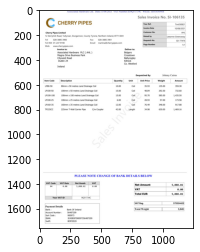

[-1]
[22.74750826]


In [58]:
img = cv2.imread('/home/vimalkumar/Documents/Classification/invoice/invoice model/train/invoice/AHL_77922_521805.jpeg')
print(img.shape)

plt.imshow(img)
im = cv2.resize(img,(200,200))
im = im.reshape(1,200,200,3)
plt.show()

pred = model_1.predict(im)
pred = pred.reshape(1,-1)
pr = one.predict(pred)
print(pr)
print(one.score_samples(pred))

In [79]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(8,(3,3),activation = 'relu',
                                                            input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                                           
                                    #tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                                    #tf.keras.layers.MaxPool2D(2,2),
                                                           
                                    tf.keras.layers.Flatten(),
                                     
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(2,activation='softmax')]
                                                          )
                                                           
                                    

In [80]:
model.compile(loss='binary_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])

In [81]:
model_fit = model.fit(train_dataset,
                     #steps_per_epoch=3,
                     epochs=1,
                     validation_data=test_dataset,
                     verbose=True)

6/6 [==============================] - 32s 5s/step - loss: 0.0118 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [84]:
from glob import glob
folders = glob('/home/vimalkumar/Documents/Classification/invoice/invoice model/train/*')
#print(folders)
print(len(folders))

1


In [85]:
keys = []
values = []
for key in range(len(folders)):
    #print(key)
    keys.append(key)
for path in os.listdir(train_dir):
    #print(path)
    values.append(path)
dic = dict(list(zip(keys,sorted(values))))
print(dic)

{0: 'invoice'}


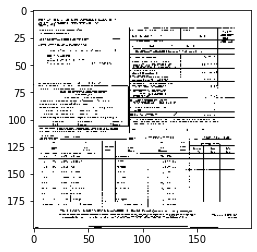

[[1.]]
[0]
invoice


In [78]:
img = image.load_img('/home/vimalkumar/Documents/File Samples/91/Good/0106584000.tif', target_size=(200,200))
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = x/255
x = np.expand_dims(x,axis=0)
images = np.vstack([x])
val = model.predict(images)
print(val)
    
a=np.argmax(val,axis=1)
print(a)
print(dic[a[0]])

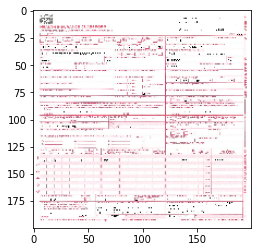

[[1.]]
INVOICE


In [13]:
img = image.load_img('/home/vimalkumar/Documents/File Samples/Invoice/Image/Train/00056344.jpeg', target_size=(200,200))
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = x/255
x = np.expand_dims(x,axis=0)
images = np.vstack([x])
val = model.predict(images)
print(val)
    
a=np.argmax(val,axis=1)
#print(a)
#print(dic[a[0]])

#print(val[0][0])
if val[0][0] > 0.8:
    print('INVOICE')
else:
    print('UNCLASSIFIED')

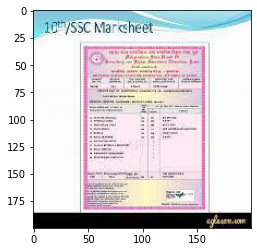

AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [14]:
img = image.load_img('/home/vimalkumar/Documents/Classification/Validation/download (2).jpeg', target_size=(200,200))
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = x/255
x = np.expand_dims(x,axis=0)
images = np.vstack([x])
val = model.predict_proba(images)
print(val)
    
a=np.argmax(val,axis=1)
#print(a)
#print(dic[a[0]])
img
#print(val[0][0])
if val[0][0] > 0.8:
    print('INVOICE')
else:
    print('UNCLASSIFIED')